In [1]:
# Import dependencies
import pandas as pd
import numpy as np

In [2]:
# Import US_Accidents_March23 CSV
nj_rows = pd.read_csv("Resources/NJ_Accident_Data.csv")
nj_rows.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-194256,Source2,2,2016-11-30 16:37:24,2016-11-30 17:22:05,40.775616,-74.237305,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Day,Day,Day
1,A-194272,Source2,2,2016-11-30 17:11:50,2016-11-30 17:56:38,40.944626,-74.100800,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Day,Day
2,A-194273,Source2,2,2016-11-30 17:13:28,2016-11-30 18:13:14,40.846260,-74.042770,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Day,Day
3,A-194282,Source2,3,2016-11-30 17:29:30,2016-11-30 18:14:16,40.641262,-74.205650,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-194301,Source2,2,2016-11-30 19:10:49,2016-11-30 20:10:39,40.957714,-73.975098,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Night,Night


In [3]:
# Count the number of rows for the Severity Column
nj_rows['Severity'].count()

140719

In [4]:
# Drop End Latitude/Longitude, Source, Nautical/Astronomical Twilight, Source and Traffic Calming columns for machine learning purposes
nj_rows = nj_rows.drop(columns=["End_Lat","End_Lng","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight","Source","Traffic_Calming"])
nj_rows.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-194256,2,2016-11-30 16:37:24,2016-11-30 17:22:05,40.775616,-74.237305,0.01,Accident pedestrian involved on County Hwy-659...,Main St,Orange,...,False,False,False,False,False,False,False,True,False,Night
1,A-194272,2,2016-11-30 17:11:50,2016-11-30 17:56:38,40.944626,-74.100800,0.01,Accident pedestrian involved on County Hwy-9 S...,40-99 Fair Lawn Ave,Fair Lawn,...,False,False,False,False,False,False,False,False,False,Night
2,A-194273,2,2016-11-30 17:13:28,2016-11-30 18:13:14,40.846260,-74.042770,0.01,Accident pedestrian involved on County Hwy-503...,Chamberlain Ave,Little Ferry,...,False,False,False,False,False,False,False,False,False,Night
3,A-194282,3,2016-11-30 17:29:30,2016-11-30 18:14:16,40.641262,-74.205650,0.01,One lane blocked due to accident on I-95 South...,I-278 W,Elizabeth,...,False,False,False,False,False,False,False,False,False,Night
4,A-194301,2,2016-11-30 19:10:49,2016-11-30 20:10:39,40.957714,-73.975098,0.01,Restrictions due to multi-vehicle accident on ...,Knickerbocker Rd,Demarest,...,False,False,False,False,False,False,False,True,False,Night


In [5]:
# Count the number at each Severity level
nj_rows["Severity"].value_counts()

2    113315
3     21318
4      5887
1       199
Name: Severity, dtype: int64

In [6]:
# Review unique values of each column for NJ dataset
nj_rows.nunique()

ID                   140719
Severity                  4
Start_Time           115628
End_Time             128597
Start_Lat             52780
Start_Lng             51905
Distance(mi)           5733
Description           81252
Street                 6588
City                    558
County                   21
State                     1
Zipcode               11541
Country                   1
Timezone                  1
Airport_Code             24
Weather_Timestamp     70593
Temperature(F)          524
Wind_Chill(F)           552
Humidity(%)              94
Pressure(in)            217
Visibility(mi)           33
Wind_Direction           24
Wind_Speed(mph)          67
Precipitation(in)       129
Weather_Condition        77
Amenity                   2
Bump                      2
Crossing                  2
Give_Way                  2
Junction                  2
No_Exit                   2
Railway                   2
Roundabout                1
Station                   2
Stop                

In [7]:
#Drop all rows with Null weather timestamp
nj_rows.dropna(subset=['Weather_Timestamp'], inplace=True)

In [8]:
# Drop location, timezon, roundabout, start latitude/longitude, turning loop and weather timestamp columns for machine learning purposes
nj_rows = nj_rows.drop(columns=["State","Street","Country","City","County",
                                "Roundabout","Timezone","Zipcode","Start_Lat","Start_Lng","Turning_Loop","Weather_Timestamp"])

In [9]:
# Preview dataset
nj_rows.head()


,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset
0,A-194256,2,2016-11-30 16:37:24,2016-11-30 17:22:05,0.01,Accident pedestrian involved on County Hwy-659...,KEWR,55.0,NaN,93.0,...,False,False,False,False,False,False,False,False,True,Night
1,A-194272,2,2016-11-30 17:11:50,2016-11-30 17:56:38,0.01,Accident pedestrian involved on County Hwy-9 S...,KTEB,54.0,NaN,90.0,...,False,True,False,False,False,False,False,False,False,Night
2,A-194273,2,2016-11-30 17:13:28,2016-11-30 18:13:14,0.01,Accident pedestrian involved on County Hwy-503...,KTEB,54.0,NaN,90.0,...,False,False,False,False,False,False,False,False,False,Night
3,A-194282,3,2016-11-30 17:29:30,2016-11-30 18:14:16,0.01,One lane blocked due to accident on I-95 South...,KLDJ,54.5,NaN,95.0,...,False,False,False,False,False,False,False,False,False,Night
4,A-194301,2,2016-11-30 19:10:49,2016-11-30 20:10:39,0.01,Restrictions due to multi-vehicle accident on ...,KTEB,54.0,NaN,90.0,...,False,False,False,False,False,False,False,False,True,Night


In [10]:
# Review the number of unique values for all columns
nj_rows.nunique()

ID                   138736
Severity                  4
Start_Time           114054
End_Time             126805
Distance(mi)           5709
Description           80293
Airport_Code             24
Temperature(F)          524
Wind_Chill(F)           552
Humidity(%)              94
Pressure(in)            217
Visibility(mi)           33
Wind_Direction           24
Wind_Speed(mph)          67
Precipitation(in)       129
Weather_Condition        77
Amenity                   2
Bump                      2
Crossing                  2
Give_Way                  2
Junction                  2
No_Exit                   2
Railway                   2
Station                   2
Stop                      2
Traffic_Signal            2
Sunrise_Sunset            2
dtype: int64

In [11]:
# Drop additional columns including the ID, Description, Airport_Code and End time columns for machine learning purposes
nj_rows = nj_rows.drop(columns=["ID","End_Time","Description","Airport_Code"])

In [12]:
#Change Severity 1 and 2 to 0 (i.e. less severe)
nj_rows["Severity"] = nj_rows["Severity"].replace([1,2],0)

In [13]:
# Preview dataframe
nj_rows.head()

,Severity,Start_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset
0,0,2016-11-30 16:37:24,0.01,55.0,NaN,93.0,29.79,2.5,ENE,6.9,...,False,False,False,False,False,False,False,False,True,Night
1,0,2016-11-30 17:11:50,0.01,54.0,NaN,90.0,29.78,4.0,East,12.7,...,False,True,False,False,False,False,False,False,False,Night
2,0,2016-11-30 17:13:28,0.01,54.0,NaN,90.0,29.78,4.0,East,12.7,...,False,False,False,False,False,False,False,False,False,Night
3,3,2016-11-30 17:29:30,0.01,54.5,NaN,95.0,29.77,4.0,East,8.1,...,False,False,False,False,False,False,False,False,False,Night
4,0,2016-11-30 19:10:49,0.01,54.0,NaN,90.0,29.76,4.0,Variable,5.8,...,False,False,False,False,False,False,False,False,True,Night


In [14]:
# Change Severity 3 and 4 to 1 (i.e. more severe)
nj_rows["Severity"] = nj_rows["Severity"].replace([3,4],1)
nj_rows.head(20)

,Severity,Start_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset
0,0,2016-11-30 16:37:24,0.01,55.0,NaN,93.0,29.79,2.5,ENE,6.9,...,False,False,False,False,False,False,False,False,True,Night
1,0,2016-11-30 17:11:50,0.01,54.0,NaN,90.0,29.78,4.0,East,12.7,...,False,True,False,False,False,False,False,False,False,Night
2,0,2016-11-30 17:13:28,0.01,54.0,NaN,90.0,29.78,4.0,East,12.7,...,False,False,False,False,False,False,False,False,False,Night
3,1,2016-11-30 17:29:30,0.01,54.5,NaN,95.0,29.77,4.0,East,8.1,...,False,False,False,False,False,False,False,False,False,Night
4,0,2016-11-30 19:10:49,0.01,54.0,NaN,90.0,29.76,4.0,Variable,5.8,...,False,False,False,False,False,False,False,False,True,Night
5,1,2016-11-30 20:41:03,0.01,52.0,NaN,100.0,29.68,3.0,NNE,12.7,...,False,False,False,False,False,False,False,False,False,Night
6,1,2016-11-30 22:33:51,0.01,50.0,NaN,100.0,29.60,5.0,NNE,6.9,...,False,False,False,False,False,False,False,False,False,Night
7,1,2016-11-30 22:37:35,0.01,50.0,NaN,100.0,29.60,5.0,NNE,6.9,...,False,False,False,False,False,False,False,False,False,Night
8,1,2016-11-30 22:35:55,0.01,52.0,NaN,89.0,29.60,3.0,NE,8.1,...,False,False,False,True,False,False,False,False,False,Night
9,0,2016-12-01 04:07:16,0.01,53.1,NaN,93.0,29.48,10.0,WSW,6.9,...,False,False,False,False,False,False,False,False,False,Night


In [15]:
# Confirm value_counts of newly grouped severity levels
nj_rows["Severity"].value_counts()

0    111830
1     26906
Name: Severity, dtype: int64

In [16]:
# Check value_counts of Wind_Direction column
nj_rows["Wind_Direction"].value_counts()

CALM        14669
NW           9553
WNW          9510
W            8291
NNW          7957
Calm         7213
SW           6944
N            6525
VAR          6316
WSW          6224
NNE          6019
SSW          5913
S            5809
NE           5572
SSE          4784
ENE          4305
E            3559
SE           3423
West         3372
North        3056
ESE          2690
Variable     2322
South        2057
East         1650
Name: Wind_Direction, dtype: int64

In [17]:
# Check value_counts of Sunrise_Sunset column
nj_rows["Sunrise_Sunset"].value_counts()

Day      96977
Night    40516
Name: Sunrise_Sunset, dtype: int64

In [18]:
#Change True to 1 
nj_rows = nj_rows.replace(True, 1)
nj_rows.head()

,Severity,Start_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset
0,0,2016-11-30 16:37:24,0.01,55.0,NaN,93.0,29.79,2.5,ENE,6.9,...,False,False,False,False,False,False,False,False,1,Night
1,0,2016-11-30 17:11:50,0.01,54.0,NaN,90.0,29.78,4.0,East,12.7,...,False,1,False,False,False,False,False,False,False,Night
2,0,2016-11-30 17:13:28,0.01,54.0,NaN,90.0,29.78,4.0,East,12.7,...,False,False,False,False,False,False,False,False,False,Night
3,1,2016-11-30 17:29:30,0.01,54.5,NaN,95.0,29.77,4.0,East,8.1,...,False,False,False,False,False,False,False,False,False,Night
4,0,2016-11-30 19:10:49,0.01,54.0,NaN,90.0,29.76,4.0,Variable,5.8,...,False,False,False,False,False,False,False,False,1,Night


In [19]:
#Changing all False to 0
nj_rows = nj_rows.replace(False, 0)
nj_rows.head()

,Severity,Start_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset
0,0,2016-11-30 16:37:24,0.01,55.0,NaN,93.0,29.79,2.5,ENE,6.9,...,0,0,0,0,0,0,0,0,1,Night
1,0,2016-11-30 17:11:50,0.01,54.0,NaN,90.0,29.78,4.0,East,12.7,...,0,1,0,0,0,0,0,0,0,Night
2,0,2016-11-30 17:13:28,0.01,54.0,NaN,90.0,29.78,4.0,East,12.7,...,0,0,0,0,0,0,0,0,0,Night
3,1,2016-11-30 17:29:30,0.01,54.5,NaN,95.0,29.77,4.0,East,8.1,...,0,0,0,0,0,0,0,0,0,Night
4,0,2016-11-30 19:10:49,0.01,54.0,NaN,90.0,29.76,4.0,Variable,5.8,...,0,0,0,0,0,0,0,0,1,Night


In [20]:
# Clean Wind_Direction column by merging Calm and CALM values
nj_rows["Wind_Direction"] = nj_rows["Wind_Direction"].replace("Calm", "CALM")
nj_rows["Wind_Direction"].value_counts()

CALM        21882
NW           9553
WNW          9510
W            8291
NNW          7957
SW           6944
N            6525
VAR          6316
WSW          6224
NNE          6019
SSW          5913
S            5809
NE           5572
SSE          4784
ENE          4305
E            3559
SE           3423
West         3372
North        3056
ESE          2690
Variable     2322
South        2057
East         1650
Name: Wind_Direction, dtype: int64

In [21]:
# Replace North directions with N
nj_rows["Wind_Direction"] = nj_rows["Wind_Direction"].replace("North", "N")
nj_rows["Wind_Direction"].value_counts()

CALM        21882
N            9581
NW           9553
WNW          9510
W            8291
NNW          7957
SW           6944
VAR          6316
WSW          6224
NNE          6019
SSW          5913
S            5809
NE           5572
SSE          4784
ENE          4305
E            3559
SE           3423
West         3372
ESE          2690
Variable     2322
South        2057
East         1650
Name: Wind_Direction, dtype: int64

In [22]:
# Replace South directions with S
nj_rows["Wind_Direction"] = nj_rows["Wind_Direction"].replace("South", "S")
nj_rows["Wind_Direction"].value_counts()

CALM        21882
N            9581
NW           9553
WNW          9510
W            8291
NNW          7957
S            7866
SW           6944
VAR          6316
WSW          6224
NNE          6019
SSW          5913
NE           5572
SSE          4784
ENE          4305
E            3559
SE           3423
West         3372
ESE          2690
Variable     2322
East         1650
Name: Wind_Direction, dtype: int64

In [23]:
# Replace West directions with W
nj_rows["Wind_Direction"] = nj_rows["Wind_Direction"].replace("West", "W")
nj_rows["Wind_Direction"].value_counts()

CALM        21882
W           11663
N            9581
NW           9553
WNW          9510
NNW          7957
S            7866
SW           6944
VAR          6316
WSW          6224
NNE          6019
SSW          5913
NE           5572
SSE          4784
ENE          4305
E            3559
SE           3423
ESE          2690
Variable     2322
East         1650
Name: Wind_Direction, dtype: int64

In [24]:
# Replace East directions with E
nj_rows["Wind_Direction"] = nj_rows["Wind_Direction"].replace("East", "E")
nj_rows["Wind_Direction"].value_counts()

CALM        21882
W           11663
N            9581
NW           9553
WNW          9510
NNW          7957
S            7866
SW           6944
VAR          6316
WSW          6224
NNE          6019
SSW          5913
NE           5572
E            5209
SSE          4784
ENE          4305
SE           3423
ESE          2690
Variable     2322
Name: Wind_Direction, dtype: int64

In [25]:
# Replace Variable directions with VAR
nj_rows["Wind_Direction"] = nj_rows["Wind_Direction"].replace("Variable", "VAR")
nj_rows["Wind_Direction"].value_counts()

CALM    21882
W       11663
N        9581
NW       9553
WNW      9510
VAR      8638
NNW      7957
S        7866
SW       6944
WSW      6224
NNE      6019
SSW      5913
NE       5572
E        5209
SSE      4784
ENE      4305
SE       3423
ESE      2690
Name: Wind_Direction, dtype: int64

In [26]:
# Check dataframe
nj_rows.head()

,Severity,Start_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset
0,0,2016-11-30 16:37:24,0.01,55.0,NaN,93.0,29.79,2.5,ENE,6.9,...,0,0,0,0,0,0,0,0,1,Night
1,0,2016-11-30 17:11:50,0.01,54.0,NaN,90.0,29.78,4.0,E,12.7,...,0,1,0,0,0,0,0,0,0,Night
2,0,2016-11-30 17:13:28,0.01,54.0,NaN,90.0,29.78,4.0,E,12.7,...,0,0,0,0,0,0,0,0,0,Night
3,1,2016-11-30 17:29:30,0.01,54.5,NaN,95.0,29.77,4.0,E,8.1,...,0,0,0,0,0,0,0,0,0,Night
4,0,2016-11-30 19:10:49,0.01,54.0,NaN,90.0,29.76,4.0,VAR,5.8,...,0,0,0,0,0,0,0,0,1,Night


In [27]:
# Check mean of Wind_Chill
nj_rows["Wind_Chill(F)"].mean()


53.41298866686822

In [28]:
# Check median of Wind_Chill to compare to mean
nj_rows["Wind_Chill(F)"].median()

55.0

In [29]:
nj_rows["Temperature(F)"].mean()

57.24500351635285

In [30]:
nj_rows["Temperature(F)"].median()

57.9

In [31]:
# Convert Start_Time to datetime type
nj_rows["Start_Time"] = pd.to_datetime(nj_rows["Start_Time"])

# Create new columns for the hour, month and year
nj_rows['Hour'] = nj_rows['Start_Time'].dt.hour
nj_rows['Month'] = nj_rows['Start_Time'].dt.month
nj_rows['Year'] = nj_rows['Start_Time'].dt.year

# Drop Start_Time column
nj_rows = nj_rows.drop(columns=["Start_Time"])

# Preview Dataframe
nj_rows.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Hour,Month,Year
0,0,0.01,55.0,NaN,93.0,29.79,2.5,ENE,6.9,0.02,...,0,0,0,0,0,1,Night,16,11,2016
1,0,0.01,54.0,NaN,90.0,29.78,4.0,E,12.7,0.00,...,0,0,0,0,0,0,Night,17,11,2016
2,0,0.01,54.0,NaN,90.0,29.78,4.0,E,12.7,0.00,...,0,0,0,0,0,0,Night,17,11,2016
3,1,0.01,54.5,NaN,95.0,29.77,4.0,E,8.1,0.01,...,0,0,0,0,0,0,Night,17,11,2016
4,0,0.01,54.0,NaN,90.0,29.76,4.0,VAR,5.8,0.01,...,0,0,0,0,0,1,Night,19,11,2016


In [32]:
# Use groupby function to average temperature by month and year
temperature = nj_rows.groupby(["Month", "Year"]).mean()["Temperature(F)"]
temperature

C:\Users\lhilt\AppData\Local\Temp\ipykernel_27368\1781507637.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature = nj_rows.groupby(["Month", "Year"]).mean()["Temperature(F)"]


Month  Year
1      2017    36.757183
       2018    30.579791
       2019    32.157117
       2020    38.574266
       2021    34.477439
                 ...    
12     2018    40.796815
       2019    37.707194
       2020    37.625918
       2021    43.638379
       2022    39.661005
Name: Temperature(F), Length: 85, dtype: float64

In [33]:
# Create a summary table to use groupby to average all numerical columns for data imputation purposes
summary = nj_rows.groupby(["Month", "Year"]).mean()
summary

C:\Users\lhilt\AppData\Local\Temp\ipykernel_27368\431978576.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary = nj_rows.groupby(["Month", "Year"]).mean()


Severity  Distance(mi)  Temperature(F)  Wind_Chill(F)  \
Month Year                                                          
1     2017  0.321127      0.188084       36.757183      29.552778   
      2018  0.357886      0.352946       30.579791      17.532300   
      2019  0.308891      0.269234       32.157117      21.369162   
      2020  0.306701      0.295952       38.574266      35.004464   
      2021  0.093902      0.722234       34.477439      28.852349   
...              ...           ...             ...            ...   
12    2018  0.328583      0.312276       40.796815      31.058372   
      2019  0.353059      0.375054       37.707194      33.215805   
      2020  0.094168      0.753235       37.625918      32.837733   
      2021  0.139908      0.924514       43.638379      41.258324   
      2022  0.026053      0.854321       39.661005      35.120583   

            Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
Month Year                                                               
1     2017    70.605634     30.058554        8.468649         9.706264   
      2018    67.705694     30.127927        8.082095        11.292929   
      2019    63.343434     30.071899        8.860890        10.463382   
      2020    61.849957     30.090516        9.191101         6.542705   
      2021    64.620732     29.925543        9.045009         8.176327   
...                 ...           ...             ...              ...   
12    2018    72.883487     30.070142        8.318182         9.377968   
      2019    72.076220     29.941647        7.933972         7.799197   
      2020    68.512532     29.942147        8.792910         8.522285   
      2021    61.584480     29.970409        9.195340         6.436280   
      2022    66.204364     30.064433        8.467275         8.169784   

            Precipitation(in)   Amenity  Bump  Crossing  Give_Way  Junction  \
Month Year                                                                    
1     2017           0.472385  0.004695   0.0  0.063850  0.002817  0.120188   
      2018           0.141541  0.004003   0.0  0.048839  0.005604  0.095276   
      2019           0.050876  0.008249   0.0  0.030247  0.001833  0.096242   
      2020           0.001873  0.006014   0.0  0.045533  0.004296  0.084192   
      2021           0.003591  0.007927   0.0  0.048171  0.003049  0.106098   
...                       ...       ...   ...       ...       ...       ...   
12    2018           0.054322  0.009220   0.0  0.051132  0.001676  0.111484   
      2019           0.008887  0.007021   0.0  0.042126  0.009027  0.067202   
      2020           0.004721  0.006048   0.0  0.026782  0.003456  0.119222   
      2021           0.001139  0.005352   0.0  0.033257  0.009939  0.088685   
      2022           0.007716  0.002498   0.0  0.028194  0.004640  0.102427   

             No_Exit   Railway   Station      Stop  Traffic_Signal       Hour  
Month Year                                                                     
1     2017  0.002817  0.003756  0.011268  0.015023        0.142723  11.619718  
      2018  0.001601  0.005604  0.008006  0.014412        0.107286  10.795036  
      2019  0.000000  0.000917  0.010082  0.006416        0.093492  11.188818  
      2020  0.000859  0.006014  0.009450  0.007732        0.121993  11.961340  
      2021  0.001829  0.009146  0.006707  0.003659        0.082927  12.306707  
...              ...       ...       ...       ...             ...        ...  
12    2018  0.000838  0.002515  0.007544  0.005029        0.091366  12.197821  
      2019  0.000000  0.003009  0.011033  0.012036        0.113340  11.843531  
      2020  0.001728  0.006911  0.006048  0.004752        0.063067  11.664363  
      2021  0.001529  0.014144  0.008792  0.007263        0.054664  12.302752  
      2022  0.001071  0.003926  0.003569  0.003926        0.067809  12.830835  

[85 rows x 20 columns]

In [34]:
# Convert summary information into a Dataframe
summary_df = pd.DataFrame(summary).reset_index()
summary_df.head()

,Month,Year,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Hour
0,1,2017,0.321127,0.188084,36.757183,29.552778,70.605634,30.058554,8.468649,9.706264,...,0.0,0.063850,0.002817,0.120188,0.002817,0.003756,0.011268,0.015023,0.142723,11.619718
1,1,2018,0.357886,0.352946,30.579791,17.532300,67.705694,30.127927,8.082095,11.292929,...,0.0,0.048839,0.005604,0.095276,0.001601,0.005604,0.008006,0.014412,0.107286,10.795036
2,1,2019,0.308891,0.269234,32.157117,21.369162,63.343434,30.071899,8.860890,10.463382,...,0.0,0.030247,0.001833,0.096242,0.000000,0.000917,0.010082,0.006416,0.093492,11.188818
3,1,2020,0.306701,0.295952,38.574266,35.004464,61.849957,30.090516,9.191101,6.542705,...,0.0,0.045533,0.004296,0.084192,0.000859,0.006014,0.009450,0.007732,0.121993,11.961340
4,1,2021,0.093902,0.722234,34.477439,28.852349,64.620732,29.925543,9.045009,8.176327,...,0.0,0.048171,0.003049,0.106098,0.001829,0.009146,0.006707,0.003659,0.082927,12.306707


In [35]:
# Sort Wind_Chill column (and check for NaN values)
summary_df["Wind_Chill(F)"].sort_values()

37   -12.900000
1     17.532300
2     21.369162
79    23.852361
5     24.513283
        ...    
50          NaN
51          NaN
52          NaN
57          NaN
59          NaN
Name: Wind_Chill(F), Length: 85, dtype: float64

In [36]:
# Check dtypes of columns prior to merge
summary_df.dtypes

Month                  int64
Year                   int64
Severity             float64
Distance(mi)         float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Amenity              float64
Bump                 float64
Crossing             float64
Give_Way             float64
Junction             float64
No_Exit              float64
Railway              float64
Station              float64
Stop                 float64
Traffic_Signal       float64
Hour                 float64
dtype: object

In [37]:
# Merge nj_df and summary_df on Month and Year
merged_df = nj_rows.merge(summary_df[["Temperature(F)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Month", "Year"]], 
                        how = 'left', on = ["Month", "Year"])

In [38]:
# Use combine_first function to replace any NaN values with averaged values by month and year for data imputation purposes
merged_df["Wind_Chill(F)_x"] = merged_df["Wind_Chill(F)_x"].combine_first(merged_df["Wind_Chill(F)_y"])
merged_df["Temperature(F)_x"] = merged_df["Temperature(F)_x"].combine_first(merged_df["Temperature(F)_y"])
merged_df["Humidity(%)_x"] = merged_df["Humidity(%)_x"].combine_first(merged_df["Humidity(%)_y"])
merged_df["Pressure(in)_x"] = merged_df["Pressure(in)_x"].combine_first(merged_df["Pressure(in)_y"])
merged_df["Visibility(mi)_x"] = merged_df["Visibility(mi)_x"].combine_first(merged_df["Visibility(mi)_y"])
merged_df.head()

,Severity,Distance(mi),Temperature(F)_x,Wind_Chill(F)_x,Humidity(%)_x,Pressure(in)_x,Visibility(mi)_x,Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Traffic_Signal,Sunrise_Sunset,Hour,Month,Year,Temperature(F)_y,Wind_Chill(F)_y,Humidity(%)_y,Pressure(in)_y,Visibility(mi)_y
0,0,0.01,55.0,35.581625,93.0,29.79,2.5,ENE,6.9,0.02,...,1,Night,16,11,2016,50.505685,35.581625,64.524143,30.044116,8.529183
1,0,0.01,54.0,35.581625,90.0,29.78,4.0,E,12.7,0.00,...,0,Night,17,11,2016,50.505685,35.581625,64.524143,30.044116,8.529183
2,0,0.01,54.0,35.581625,90.0,29.78,4.0,E,12.7,0.00,...,0,Night,17,11,2016,50.505685,35.581625,64.524143,30.044116,8.529183
3,1,0.01,54.5,35.581625,95.0,29.77,4.0,E,8.1,0.01,...,0,Night,17,11,2016,50.505685,35.581625,64.524143,30.044116,8.529183
4,0,0.01,54.0,35.581625,90.0,29.76,4.0,VAR,5.8,0.01,...,1,Night,19,11,2016,50.505685,35.581625,64.524143,30.044116,8.529183


In [39]:
# Drop the merged columns with _y
merged_df = merged_df.drop(columns=["Temperature(F)_y", "Wind_Chill(F)_y", "Humidity(%)_y", "Pressure(in)_y", "Visibility(mi)_y"])

In [40]:
# Use a function to remove _x from column headings
cleaned_df = merged_df.rename(columns=lambda x: x.rstrip('_x') if x.endswith('_x') else x)
cleaned_df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Hour,Month,Year
0,0,0.01,55.0,35.581625,93.0,29.79,2.5,ENE,6.9,0.02,...,0,0,0,0,0,1,Night,16,11,2016
1,0,0.01,54.0,35.581625,90.0,29.78,4.0,E,12.7,0.00,...,0,0,0,0,0,0,Night,17,11,2016
2,0,0.01,54.0,35.581625,90.0,29.78,4.0,E,12.7,0.00,...,0,0,0,0,0,0,Night,17,11,2016
3,1,0.01,54.5,35.581625,95.0,29.77,4.0,E,8.1,0.01,...,0,0,0,0,0,0,Night,17,11,2016
4,0,0.01,54.0,35.581625,90.0,29.76,4.0,VAR,5.8,0.01,...,0,0,0,0,0,1,Night,19,11,2016


In [41]:
# Use combine_first function to replace any NaN values with "Unavailable" for categorical columns data imputation purposes
cleaned_df[["Wind_Direction", "Weather_Condition", "Sunrise_Sunset"]] = cleaned_df[["Wind_Direction", "Weather_Condition", "Sunrise_Sunset"]].fillna("Unavailable")

# Use combine_first function to replace any NaN values with 0 for Wind_Speed, Precipitation and Wind_Chill columns data imputation purposes
cleaned_df[["Wind_Speed(mph)", "Precipitation(in)", "Wind_Chill(F)"]] = cleaned_df[["Wind_Speed(mph)", "Precipitation(in)", "Wind_Chill(F)"]].fillna(0)
cleaned_df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Hour,Month,Year
0,0,0.01,55.0,35.581625,93.0,29.79,2.5,ENE,6.9,0.02,...,0,0,0,0,0,1,Night,16,11,2016
1,0,0.01,54.0,35.581625,90.0,29.78,4.0,E,12.7,0.00,...,0,0,0,0,0,0,Night,17,11,2016
2,0,0.01,54.0,35.581625,90.0,29.78,4.0,E,12.7,0.00,...,0,0,0,0,0,0,Night,17,11,2016
3,1,0.01,54.5,35.581625,95.0,29.77,4.0,E,8.1,0.01,...,0,0,0,0,0,0,Night,17,11,2016
4,0,0.01,54.0,35.581625,90.0,29.76,4.0,VAR,5.8,0.01,...,0,0,0,0,0,1,Night,19,11,2016


In [42]:
# Isolate numerical columns into a dataframe
limited_df = cleaned_df.loc[:, ["Severity","Distance(mi)","Temperature(F)","Wind_Chill(F)",
                            "Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)",
                            "Precipitation(in)"]]

limited_df

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0,0.010,55.0,35.581625,93.0,29.79,2.5,6.9,0.02
1,0,0.010,54.0,35.581625,90.0,29.78,4.0,12.7,0.00
2,0,0.010,54.0,35.581625,90.0,29.78,4.0,12.7,0.00
3,1,0.010,54.5,35.581625,95.0,29.77,4.0,8.1,0.01
4,0,0.010,54.0,35.581625,90.0,29.76,4.0,5.8,0.01
...,...,...,...,...,...,...,...,...,...
138731,1,0.000,69.0,69.000000,84.0,29.94,10.0,3.0,0.00
138732,1,0.000,69.0,69.000000,84.0,29.94,10.0,3.0,0.00
138733,0,0.247,74.0,74.000000,62.0,29.98,10.0,8.0,0.00
138734,0,0.217,69.0,69.000000,75.0,29.89,10.0,0.0,0.00


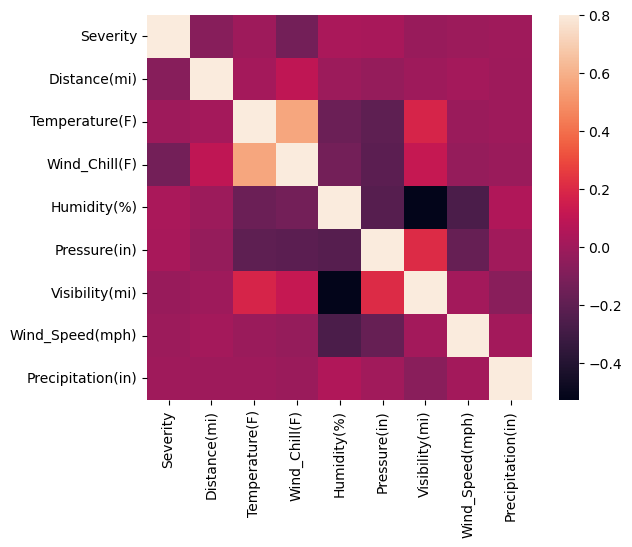

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = limited_df.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True)

plt.savefig("Output/Heat_Map.png")

plt.show()

In [44]:
cleaned_df = cleaned_df.drop(columns = ["Temperature(F)", "Month", "Hour"])

In [45]:
# Verify there are no NaN values
cleaned_df.isna().all()

Severity             False
Distance(mi)         False
Wind_Chill(F)        False
Humidity(%)          False
Pressure(in)         False
Visibility(mi)       False
Wind_Direction       False
Wind_Speed(mph)      False
Precipitation(in)    False
Weather_Condition    False
Amenity              False
Bump                 False
Crossing             False
Give_Way             False
Junction             False
No_Exit              False
Railway              False
Station              False
Stop                 False
Traffic_Signal       False
Sunrise_Sunset       False
Year                 False
dtype: bool

In [46]:
# Check dataframe
cleaned_df.head()

,Severity,Distance(mi),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,...,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Year
0,0,0.01,35.581625,93.0,29.79,2.5,ENE,6.9,0.02,Light Rain,...,0,0,0,0,0,0,0,1,Night,2016
1,0,0.01,35.581625,90.0,29.78,4.0,E,12.7,0.00,Rain,...,1,0,0,0,0,0,0,0,Night,2016
2,0,0.01,35.581625,90.0,29.78,4.0,E,12.7,0.00,Rain,...,0,0,0,0,0,0,0,0,Night,2016
3,1,0.01,35.581625,95.0,29.77,4.0,E,8.1,0.01,Light Drizzle,...,0,0,0,0,0,0,0,0,Night,2016
4,0,0.01,35.581625,90.0,29.76,4.0,VAR,5.8,0.01,Rain,...,0,0,0,0,0,0,0,1,Night,2016


In [47]:
# Check counts for each column
cleaned_df.count()

Severity             138736
Distance(mi)         138736
Wind_Chill(F)        138736
Humidity(%)          138736
Pressure(in)         138736
Visibility(mi)       138736
Wind_Direction       138736
Wind_Speed(mph)      138736
Precipitation(in)    138736
Weather_Condition    138736
Amenity              138736
Bump                 138736
Crossing             138736
Give_Way             138736
Junction             138736
No_Exit              138736
Railway              138736
Station              138736
Stop                 138736
Traffic_Signal       138736
Sunrise_Sunset       138736
Year                 138736
dtype: int64

In [48]:
# Export dataframe to csv
cleaned_df.to_csv("Resources/NJ_Data_cleaned.csv", index = False)